# Statistiques descriptives 

En première analyse, nous avons voulu regarder les évolutions de plusieurs paramètres pour en apprendre davantage sur notre base de données. 
Ainsi, dans le reste du Notebook, on trouvera les informations suivantes :
- nous avons compté le nombre de tweets par semaine, dont les évolutions sont effectivement représentatives de ce qui s'est factuellement passé en 2024 ;
- ensuite nous avons représenté le nombre et les évolutions des interactions, au total et en moyenne : nous avons pu voir qu'à certaines périodes, certains types de réaction étaient privilégiés et d'autres non, et que cela pouvait varier. Nous avons ainsi été amenés à appréhender différentes échelles temporelles pour tenter de l'expliquer au mieux;
- enfin, pour compléter ces statistiques, nous avons calculé le taux d'engagement et observé ses évolutions.

In [7]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install plotly
!pip install display
!pip install openpyxl
!pip install nbformat

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_excel('/home/onyxia/work/Scrapping_tweets/Scrapping_tweets/data_fin/tweets_fusionnes.xlsx')
dfmois = pd.read_excel('/home/onyxia/work/Scrapping_tweets/Scrapping_tweets/data_fin/tweets_fusionnes.xlsx')

## 1. Nombre de tweets par semaine

On commence par représenter l'évolution du nombre de tweets par semaine, ce que nous effectuons avec plotly :

In [5]:
# Grouper par semaine et compter les tweets
tweets_per_week = df.groupby('YearWeek').size().reset_index(name='TweetCount')

# Convertir YearWeek en dates réelles (qui indique le début de la semaine)
tweets_per_week['Date'] = pd.to_datetime(tweets_per_week['YearWeek'] + '-1', format='%Y-%U-%w')

# on vérifie que toutes les semaines de l'année soient présentes
all_weeks = pd.date_range(start=tweets_per_week['Date'].min(), 
                          end=tweets_per_week['Date'].max(), 
                          freq='W-SUN')  # toutes les semaines

# Création du graphique avec le package plotly
fig = go.Figure()

# Ajout de la ligne pour le nombre de tweets
fig.add_trace(go.Scatter(
    x=tweets_per_week['Date'],
    y=tweets_per_week['TweetCount'],
    mode='lines+markers',
    name="Nombre de tweets",
    line=dict(color='royalblue', width=2),
    marker=dict(size=8, color='blue', symbol='star')
))

# on ajoute un encadré noir autour de la zone de graphique
fig.update_layout(
    title="Nombre de tweets par semaine",
    xaxis=dict(
        title="Semaines de 2024",
        tickformat="%b %d",  # Format de l'axe X : mois jour
        tickangle=-45,
        tickvals=tweets_per_week['Date'],  # Afficher toutes les semaines
        ticktext=tweets_per_week['Date'].dt.strftime('%b %d')  # Format texte 
    ),
    yaxis=dict(
        title="Nombre de tweets",
        showline=True,  # Afficher une bordure 
        linecolor='gray',  # Bordure en gris
        linewidth=1.5
    ),
    plot_bgcolor='white',  # Fond blanc pour mieux voir l'encadré
    margin=dict(l=50, r=50, t=50, b=50),  # Marges autour du graphique
    template="plotly_white",
    hovermode="x unified",  # Afficher l'info au survol
    legend=dict(
        x=0.01, y=0.99,
        bgcolor='rgba(255,255,255,0.7)',
        bordercolor='gray',
        borderwidth=0.7
    )
)

# Ajuster la taille et le style de la figure
fig.update_layout(
    width=1100,
    height=600,
    template="plotly_white",
    plot_bgcolor="white",
    hovermode="x unified",
    legend=dict(
        title="Type d'Interaction",
        x=0.01, y=0.99,
        bgcolor='rgba(255,255,255,0.7)',
        bordercolor='black',
        borderwidth=1
    )
)

# Ajouter un contour noir autour de la zone graphique
fig.update_xaxes(showline=True, linecolor='gray', linewidth=2)  # Encadré axe X
fig.update_yaxes(showline=True, linecolor='gray', linewidth=2)  # Encadré axe Y

# Afficher le graphique
fig.show()

Ainsi, on peut voir clairement que les utilisateurs qui tweetent à ce sujet le font à des périodes bien précises, liées sans doute à l'élection présidentielle américaine.
De façon assez marquante, les semaines du 3 novembre et du 10 novembre sont particulièrement significatives de la victoire de Trump.

Nous avons décidé de nous restreindre à 2024 car les variations du nombre de tweets fin 2023 étaient similaires à celles de début 2023. De plus, nous avons préféré nous pencher sur cette période spécifique dans la démarche de notre projet.

Nous allons maintenant observer l'évolution des interactions au cours du temps.

## 2. Nombre et évolution des interactions

Les interactions que nous allons étudier sont les likes, les vues, les retweets et les commentaires. Certaines de ces interactions témoignent d'un plus fort engagement que d'autres, tels que les retweets et les commentaires (qui permettent de repartager des tweets), a contrario des likes et des vues.

### 2.1. Total des interactions

In [9]:

# On groupe les interactions par semaine en faisant le total
weekly_stats = df.groupby('YearWeek').agg(
    TotalLikes=('Likes', 'sum'),
    TotalRepost=('Repost', 'sum'),
    TotalComments=('Comments', 'sum'),
    NombreTweets=('YearWeek', 'size')
).reset_index()

# on convertit YearWeek en dates réelles 
weekly_stats['Date'] = pd.to_datetime(weekly_stats['YearWeek'] + '-1', format='%Y-%U-%w')

# Mettre les données au format "long", nécessaire pour plotly
long_format = weekly_stats.melt(
    id_vars=['Date'], 
    value_vars=['TotalLikes', 'TotalRepost', 'TotalComments'], 
    var_name='Interaction', 
    value_name='Valeur'
)

# Remplacer les noms des interactions pour qu'ils apparaissent dans la légende
long_format['Interaction'] = long_format['Interaction'].replace({
    'TotalLikes': 'Total des likes',
    'TotalRepost': 'Total des retweets',
    'TotalComments': 'Total des commentaires'
})

# Création du graphique avec Plotly
fig = px.line(
    long_format, 
    x='Date', 
    y='Valeur', 
    color='Interaction', 
    markers=True,
    title='Total des interactions par semaine',
    labels={'Valeur': 'Total des interactions', 'Date': 'Date', 'Interaction': 'Type d\'interaction'}
)

# Personnalisation des axes et de la mise en page et affichage des mois
fig.update_xaxes(
    title="Semaines de 2024",
    showline=True,
    linecolor="gray",
    linewidth=0.5,
    mirror=True,
    showgrid=True,
    gridcolor="lightgray",
    tickmode="linear",
    dtick="M1",  # Espacement d'un mois
    tickformat="%b %Y",  # Format mois-année
    range=[weekly_stats['Date'].min(), weekly_stats['Date'].max()]  # plage des dates
)

fig.update_yaxes(
    showline=True,
    linewidth=0.5,
    linecolor="black",
    mirror=True,
    showgrid=True,
    gridcolor='lightgray'
)

fig.update_layout(
    width=1200,
    height=600,
    template='plotly_white',
    hovermode="x unified",
    legend=dict(
        title="Type d'interaction",
        x=0.01, y=0.99,
        bgcolor='rgba(255,255,255,0.7)',
        bordercolor='black',
        borderwidth=1
    )
)

# Afficher le graphique
fig.show()

Ce graphique permet de se rendre compte de la structure des interactions : la courbe des likes est toujours au dessus, ce qui n'est pas étonnant au vu du moindre engagement dont témoigne le fait de liker. Face à cela, nous avons décidé de nous ramener à une même échelle pour comparer les fluctuations des interactions, et non leur valeur en soi.

### 2.2. Normalisation au total et en moyenne des interactions 

Nous avons normalisé l'échelle par rapport au maximum des valeurs prises par TotalLikes, TotalRepost et TotalComments : toutes les valeurs prises s'échelonnent de 0 à 1, où 1 correspond au maximum pris par les variables.

Nous faisons cela pour les valeurs totales, puis pour les valeurs moyennées par le nombre de tweets par semaine.

In [11]:
# On groupe les interactions par semaine en faisant le total
weekly_stats = df.groupby('YearWeek').agg(
    TotalLikes=('Likes', 'sum'),
    TotalRepost=('Repost', 'sum'),
    TotalComments=('Comments', 'sum'),
    NombreTweets=('YearWeek', 'size')
)

# Convertir YearWeek en dates réelles (début de semaine)
weekly_stats['Date'] = pd.to_datetime(weekly_stats.index + '-1', format='%Y-%U-%w')

# Normaliser les données par rapport au maximum de chaque colonne
columns_to_normalize = ['TotalLikes', 'TotalRepost', 'TotalComments']
for col in columns_to_normalize:
    weekly_stats[col + '_Norm'] = weekly_stats[col] / weekly_stats[col].max()

# Mettre les données au format "long"
long_format_totals = weekly_stats.melt(
    id_vars=['Date'], 
    value_vars=['TotalLikes_Norm', 'TotalRepost_Norm', 'TotalComments_Norm'], 
    var_name='Type d\'interaction', 
    value_name='Valeur Normalisée'
)

# Remplacer les noms des interactions pour qu'ils apparaissent dans la légende
long_format_totals['Type d\'interaction'] = long_format_totals['Type d\'interaction'].replace({
    'TotalLikes_Norm': 'Total des likes normalisé',
    'TotalRepost_Norm': 'Total des retweets normalisé',
    'TotalComments_Norm': 'Total des commentaires normalisé'
})

# Palette de couleurs pastel mais visibles
couleurs_visibles = ['#FFA07A', '#87CEEB', '#9370DB'] 

# Création du graphique interactif avec Plotly
fig = px.line(
    long_format_totals,
    x='Date',
    y='Valeur Normalisée',
    color='Type d\'interaction',
    title='Total des interactions par semaine (normalisées)',
    color_discrete_sequence=couleurs_visibles,
    markers=True
)

# Amélioration des axes pour afficher uniquement les mois à partir de Janvier 2024
fig.update_xaxes(
    title="Semaines de 2024",
    showline=True,
    linecolor="gray",
    linewidth=0.5,
    mirror=True,
    showgrid=True,
    gridcolor="lightgray",
    tickmode="linear",
    dtick="M1",  # Espacement de 1 mois
    tickformat="%b %Y",  # Format Mois Année
    range=['2024-01-01', weekly_stats['Date'].max()]  # Plage des dates : Janvier 2024 jusqu'à la fin
)

fig.update_yaxes(
    title="Proportion par rapport au maximum",
    showline=False,
    linecolor="gray",
    linewidth=0.5,
    mirror=True,
    showgrid=True,
    gridcolor="lightgray"
)

# Ajuster la taille de la figure
fig.update_layout(
    width=1100,  # Largeur 
    height=600,  # Hauteur 
    template="plotly_white",
    plot_bgcolor="white",
    hovermode="x unified",
    legend=dict(
        title="Type d'interaction",
        x=0.01, y=0.99,
        bgcolor='rgba(255,255,255,0.7)',
        bordercolor='gray',
        borderwidth=0.5
    )
)

# Afficher le graphique
fig.show()


On observe sur ce graphique les évolutions par rapport au maximum des différents types d'interaction. Les tendances ne sont pas très différentes du graphique précédent, mais sont davantage comparables : ainsi, les retweets et les likes (quasiment) ont atteint leur pic en juin 2024. En août 2024, on prend davantage conscience du nombre plus bas retweets par rapport aux likes et aux commentaires. Tout cela questionne sur ce qui s'est passé à ces périodes là, pour qu'il y ait autant de variations des interactions.

C'est pour cela que nous allons pondérer par le nombre de tweets, pour que les totaux ne soient pas biaisés par des quantités faibles ou plus importantes de tweets :

In [12]:

# Grouper par semaine
weekly_stats = df.groupby('YearWeek').agg(
    TotalLikes=('Likes', 'sum'),
    TotalRepost=('Repost', 'sum'),
    TotalComments=('Comments', 'sum'),
    NombreTweets=('YearWeek', 'size')
)

# Calcul des moyennes pondérées
weekly_stats['MoyLikes'] = weekly_stats['TotalLikes'] / weekly_stats['NombreTweets']
weekly_stats['MoyRepost'] = weekly_stats['TotalRepost'] / weekly_stats['NombreTweets']
weekly_stats['MoyComments'] = weekly_stats['TotalComments'] / weekly_stats['NombreTweets']

# Convertir YearWeek en dates réelles (début de semaine)
weekly_stats['Date'] = pd.to_datetime(weekly_stats.index + '-0', format='%Y-%U-%w')

# Normaliser les moyennes par rapport au maximum de chaque colonne
columns_to_normalize = ['MoyLikes', 'MoyRepost', 'MoyComments']
for col in columns_to_normalize:
    weekly_stats[col + '_Norm'] = weekly_stats[col] / weekly_stats[col].max()

# Mettre les données au format "long"
long_format_means = weekly_stats.melt(
    id_vars=['Date'], 
    value_vars=['MoyLikes_Norm', 'MoyRepost_Norm', 'MoyComments_Norm'], 
    var_name='Type d\'interaction', 
    value_name='Valeur Normalisée'
)

# Remplacer les noms des interactions pour qu'ils apparaissent dans la légende
long_format_means['Type d\'interaction'] = long_format_means['Type d\'interaction'].replace({
    'MoyLikes_Norm': 'Moyenne des likes normalisée',
    'MoyRepost_Norm': 'Moyenne des retweets normalisée',
    'MoyComments_Norm': 'Moyenne des commentaires normalisée'
})

# Palette de couleurs plus visibles mais douces
couleurs_visibles = ['#FFB347', '#6A5ACD', '#FF6347']  

# Création du graphique interactif avec Plotly
fig = px.line(
    long_format_means,
    x='Date',
    y='Valeur Normalisée',
    color='Type d\'interaction',
    title='Moyenne des interactions par tweet par semaine (normalisées)',
    color_discrete_sequence=couleurs_visibles,
    markers=True
)

# Personnalisation des axes et affichage des mois
fig.update_xaxes(
    title="Semaines de 2024",
    showline=True,
    linecolor="gray",
    linewidth=0.5,
    mirror=True,
    showgrid=True,
    gridcolor="lightgray",
    tickmode="linear",
    dtick="M1",  # Espacement d'un mois
    tickformat="%b %Y",  # Format Mois Année
    range=[weekly_stats['Date'].min(), weekly_stats['Date'].max()]  # Plage des dates
)

fig.update_yaxes(
    title="Proportion par rapport au maximum",
    showline=False,
    linecolor="black",
    linewidth=1.5,
    mirror=True,
    showgrid=True,
    gridcolor="lightgray"
)

# Ajuster la taille et le style de la figure
fig.update_layout(
    width=1100,
    height=600,
    template="plotly_white",
    plot_bgcolor="white",
    hovermode="x unified",
    legend=dict(
        title="Type d'Interaction",
        x=0.01, y=0.99,
        bgcolor='rgba(255,255,255,0.7)',
        bordercolor='black',
        borderwidth=1
    )
)

# Afficher le graphique
fig.show()


On observe directement deux choses :
- les pics observés en juin et en août 2024 n'ont pas été diminués par le nombre de tweets, ce qui signifie que certains tweets ont suscité beaucoup plus d'interactions que d'autres.
- en novembre 2024, le nombre élevé des interactions s'expliquaient par un nombre de tweets beaucoup plus important à cette période là (ce qu'on a pu observer dans le premier graphique). De fait, les interactions n'ont pas été significativement plus importantes qu'à d'autres moments de l'année : les utilisateurs ont donc beaucoup plus tweeté que réagi.

Tout cela, nous allons l'expliquer ci-dessous. 

### 2.3. Analyse des interactions par mois

Face aux variations hebdomadaires des interactions, nous avons voulu élargir notre analyse à une échelle mensuelle. Nous avons choisi une représentation un peu différente, en regardant en cumulé les interactions. C'est ce qu'on peut voir dans le graphique suivant :

/tmp/ipykernel_81841/3343494294.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_coord = dates[i]


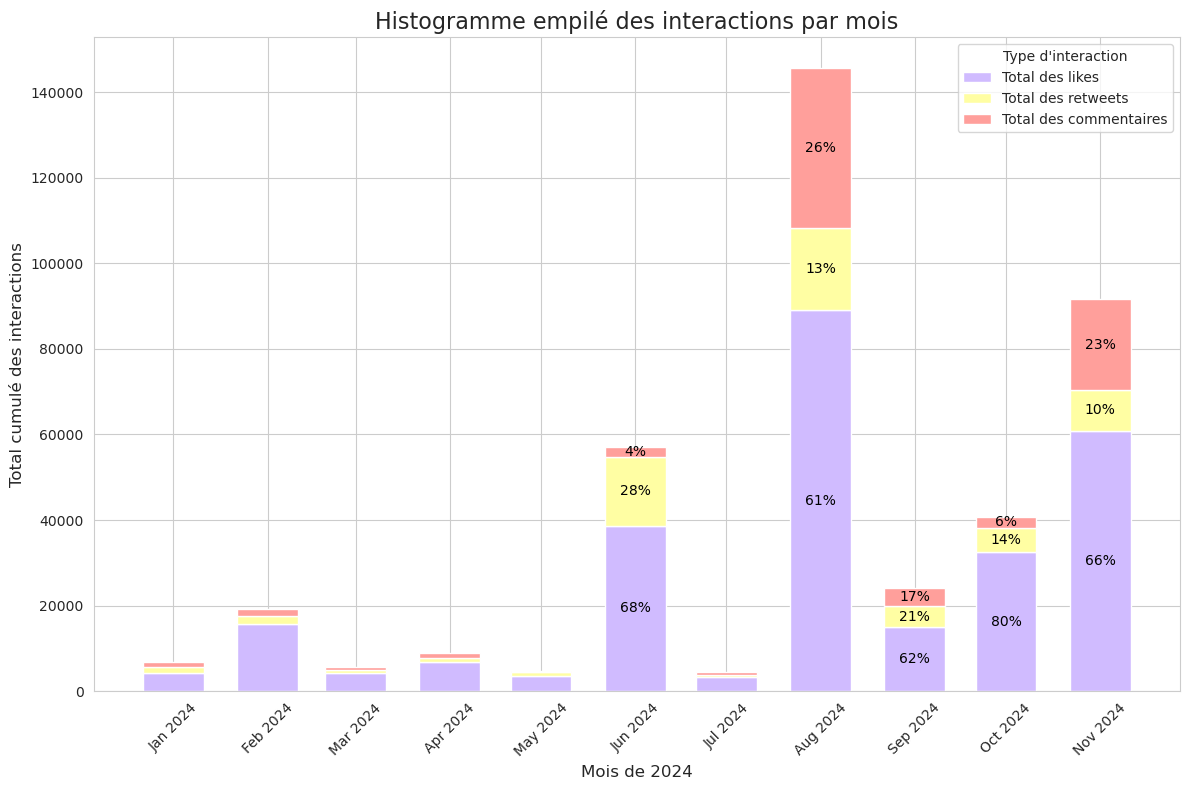

In [10]:
# Vérifiez que les colonnes nécessaires existent
if not {'Likes', 'Views', 'Repost', 'Comments', 'ConvertedDate'}.issubset(dfmois.columns):
    raise ValueError("Le fichier doit contenir les colonnes 'Likes', 'Views', 'Repost', 'Comments', et 'ConvertedDate'")

# Ajouter une colonne YearMonth
dfmois['YearMonth'] = dfmois['ConvertedDate'].dt.strftime('%Y-%m')

# Grouper par mois
monthly_stats = dfmois.groupby('YearMonth').agg(
    TotalLikes=('Likes', 'sum'),
    TotalRepost=('Repost', 'sum'),
    TotalComments=('Comments', 'sum'),
)

# Convertir YearMonth en date réelle (début de mois)
monthly_stats['Date'] = pd.to_datetime(monthly_stats.index + '-01', format='%Y-%m-%d')

# Initialisation des données pour l'histogramme empilé
dates = monthly_stats['Date']
likes = monthly_stats['TotalLikes']
reposts = monthly_stats['TotalRepost']
comments = monthly_stats['TotalComments']
total = likes + reposts + comments  # Total cumulé pour chaque mois

# Configuration du style Seaborn
sns.set_style("whitegrid")
palette = sns.color_palette("pastel")

# Largeur des barres
bar_width = 20  # Ajuster la largeur des barres

# Mois à ne pas afficher
mois_exclus = ['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-07']

# Création de l'histogramme empilé
plt.figure(figsize=(12, 8))
bars1 = plt.bar(dates, likes, width=bar_width, color=palette[4], label='Total des likes')
bars2 = plt.bar(dates, reposts, width=bar_width, bottom=likes, color=palette[8], label='Total des retweets')
bars3 = plt.bar(dates, comments, width=bar_width, bottom=likes + reposts, color=palette[3], label='Total des commentaires')

# Ajouter les pourcentages sur les barres
for i, (like, repost, comment, tot) in enumerate(zip(likes, reposts, comments, total)):
    x_coord = dates[i]
    if x_coord.strftime('%Y-%m') not in mois_exclus:  # Exclure certains mois
        # Afficher les pourcentages
        plt.text(x_coord, like / 2, f'{like / tot:.0%}', ha='center', va='center', fontsize=10, color='black')
        plt.text(x_coord, like + repost / 2, f'{repost / tot:.0%}', ha='center', va='center', fontsize=10, color='black')
        plt.text(x_coord, like + repost + comment / 2, f'{comment / tot:.0%}', ha='center', va='center', fontsize=10, color='black')

# Personnalisation du graphique
plt.title('Histogramme empilé des interactions par mois', fontsize=16)
plt.xlabel('Mois de 2024', fontsize=12)
plt.ylabel('Total cumulé des interactions', fontsize=12)
plt.xticks(dates, dates.dt.strftime('%b %Y'), rotation=45)
plt.legend(title='Type d\'interaction')
plt.tight_layout()

# Afficher le graphique
plt.show()


La structure est étonnante : en effet, alors que le nombre de tweets atteint les 2000 durant la deuxième semaine de novembre, contre 250 environ en août, les interactions sont beaucoup (et de loin) plus nombreuses en août que durant les autres mois de l'année. 

C'est pour cela que nous allons voir ce qui s'est passé en août pour essayer de comprendre ce qui a été aussi significatif. Pour ce faire, nous allons regarder le nombre total d'interactions par jour.

In [ ]:

# Filtrer pour Août 2024
df_aout = df[(df['ConvertedDate'].dt.month == 8) & (df['ConvertedDate'].dt.year == 2024)].copy()

# Créer une colonne pour le total global des interactions 
df_aout['TotalInteractions'] = df_aout['Likes'] + df_aout['Repost'] + df_aout['Comments']

# Grouper par jour pour calculer les statistiques quotidiennes
daily_stats = df_aout.groupby(df_aout['ConvertedDate'].dt.date).agg(
    TotalLikes=('Likes', 'sum'),
    TotalViews=('Views', 'sum'),
    TotalRepost=('Repost', 'sum'),
    TotalComments=('Comments', 'sum'),
    Total=('TotalInteractions', 'sum'),
    NombreTweets=('ConvertedDate', 'size') 
).reset_index()

# Reconvertir la colonne ConvertedDate en datetime après le groupby
daily_stats['ConvertedDate'] = pd.to_datetime(daily_stats['ConvertedDate'])

# Création du graphique
fig = go.Figure()

# Ajout d'un histogramme pour le total des interactions
fig.add_trace(go.Bar(
    x=daily_stats['ConvertedDate'],
    y=daily_stats['Total'],
    marker_color='purple',
    name='Total Global des Interactions'
))

# on personnalise le graphique
fig.update_layout(
    title="Histogramme des interactions globales par jour en août 2024",
    xaxis=dict(
        title="Jours du mois d'août",
        tickvals=daily_stats['ConvertedDate'],
        ticktext=daily_stats['ConvertedDate'].dt.strftime('%d'),
        tickangle=-45,
        showline=True,           # Ajouter une ligne pour l'axe X
        linecolor="gray",       # Couleur grise pour l'axe
        linewidth=1            # Épaisseur 
    ),
    yaxis=dict(
        title="Total des interactions",
        showline=True,           # Ajouter une ligne pour l'axe Y
        linecolor="gray",       # Couleur grise pour l'axe
        linewidth=1            # Épaisseur
    ),
    bargap=0.1,
    template="plotly_white",
    plot_bgcolor="white",  # Fond blanc pour le graphique
    hovermode="x unified",
    legend=dict(
        title="Légende",
        x=0.01, y=0.99,
        bgcolor='rgba(255,255,255,0.7)',
        bordercolor='black',
        borderwidth=1
    )
)

# Afficher le graphique
fig.show()


Deux jours ressortent ici, le 9 et le 13 août : il suffit dès lors de taper dans un moteur de recherche ces dates et "twitter" pour trouver ce qui a suscité autant de réaction.
- *9 août* : un tweet de Elon Musk a déclenché beaucoup de retweets et de commentaires (https://x.com/elonmusk/status/1821952295866663423?lang=fr)
- *13 août* : Elon Musk mène une interview de Donal Trump sur Twitter, ce qui a nécessairement entraîné des likes, des retweets et des commentaires des utilisateurs, sans nécessairement augmenter le nombre de tweets (https://www.rtl.fr/actu/international/elon-musk-interviewe-donald-trump-qu-il-soutient-pour-la-presidentielle-7900408157)

Nous nous sommes restreint au mois d'août 2024, mais nous aurions aussi pu le faire avec juin : le procédé reste le même.


## 3. Création d'un indice : le taux d'engagement

Pour essayer de condenser toutes les informations précédentes en une seule mesure, nous avons calculer le taux d'engagement égal au nombre total d'interactions sur le nombre de tweets. Dit autrement, c'est le nombre de réactions que suscite en moyenne un tweet durant un mois.

In [19]:

# Fonction pour calculer les statistiques mensuelles
def calculate_monthly_stats(df):
    """
    Calculer les statistiques mensuelles : nombre de tweets et taux d'engagement.
    """
    monthly_stats = df.groupby('YearMonth').agg(
        TotalLikes=('Likes', 'sum'),
        TotalComments=('Comments', 'sum'),
        TotalRepost=('Repost', 'sum'),
        NombreTweets=('YearMonth', 'size')
    ).reset_index()

    # Calculer le taux d'engagement
    monthly_stats['Taux_Engagement'] = (
        (monthly_stats['TotalLikes'] + monthly_stats['TotalComments'] + monthly_stats['TotalRepost'])
        / monthly_stats['NombreTweets']
    )
    return monthly_stats

# Calcul des statistiques
monthly_stats = calculate_monthly_stats(df)

# Création du graphique avec Plotly
fig = go.Figure()

# Ajouter les barres pour le nombre de tweets
fig.add_trace(go.Bar(
    x=monthly_stats['YearMonth'],
    y=monthly_stats['NombreTweets'],
    name='Nombre de tweets',
    marker_color='skyblue',
    opacity=0.6,
    yaxis='y1'
))

# Ajouter la courbe pour le taux d'engagement avec une deuxième échelle
fig.add_trace(go.Scatter(
    x=monthly_stats['YearMonth'],
    y=monthly_stats['Taux_Engagement'],
    mode='lines+markers',
    name="Taux d'engagement (par tweet)",
    line=dict(color='orange', width=3),
    marker=dict(size=8),
    yaxis='y2'
))

# Personnalisation des axes et du fond
fig.update_layout(
    title="Nombre de tweets et évolution du taux d'engagement mensuel",
    xaxis=dict(
        title="Mois de 2024",
        tickangle=-45,
        tickmode='array',  # Afficher tous les mois
        tickvals=monthly_stats['YearMonth'],  # Valeurs des mois
        ticktext=monthly_stats['YearMonth'],  # Libellé des mois
    ),
    yaxis=dict(
        title="Nombre de tweets",
        side="left",
        showgrid=True
    ),
    yaxis2=dict(
        title="Taux d'engagement (par tweet)",
        side="right",
        overlaying="y",
        showgrid=False,
        tickformat=".0f"  # Supprime les décimales pour l'axe de droite
    ),
    template="plotly_white",
    #paper_bgcolor='rgba(230,230,230,0.8)',  # Fond grisé
    plot_bgcolor='rgba(240,240,240,0.9)',   # Fond du graphique
    barmode='overlay',
    legend=dict(
        title="Légende",
        x=0.01,  # Déplacer la légende vers la gauche
        y=0.99,
        bgcolor='rgba(255,255,255,0.7)'  # Fond semi-transparent pour la légende
    )
)

# Afficher le graphique dans le notebook
fig.show()


On retrouve ce qu'on avait observé en juin et en août 2024, mais de façon plus significative en juin. C'est ce qu'on avait vu lors de la normalisation des moyennes, que les commentaires et les retweets avaient simultanément augmenté à cette période. Les tweets de juin et d'août 2024 ont beaucoup plus mobilisé les utilisateurs qu'en octobre et en novembre, ce qui peut s'expliquer - on l'a vu - par la croissance des nombres de tweets.